# 2. Datenvorverarbeitung mit Pandas: Food Nutrient Database
## a) Laden Sie die Datenbank als zip-File aus Moodle herunter und lesen Sie dieses File direkt in ein neues Notebook ein.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import zipfile as zf
import json as json
%matplotlib inline
%load_ext version_information

In [2]:
archivename = "foods-2011-10-03.json.zip"
filename = "foods-2011-10-03.json"
with zf.ZipFile(archivename) as z:
    with z.open(filename) as f:
        data = json.load(f)

### b)
## b.1) Greifen Sie sich ein beliebiges Nahrungsmittel heraus und lassen sich die Namen der Einträge mit der Methode dict.keys() anzeigen.

In [10]:
d0 = data[0]
d0.keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

### b.2) Lassen Sie sich wiederum einen beliebigen Eintrag der Nährstoffliste anzeigen.

In [11]:
d0["nutrients"]

[{'value': 25.18,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 29.2,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 3.06,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 3.28, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 376.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 39.28,
  'units': 'g',
  'description': 'Water',
  'group': 'Composition'},
 {'value': 1573.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 673.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 0.64,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 22.0,
  'units': 'mg',
  'description': 'Magnesium, Mg',
  'group': 'Elements'},
 {'value': 490.0,

### b.3) Teile dieser hierarchischen Struktur sollen nun in eine einheitliche Tabelle umgewandelt werden, um eine explorative Analyse durchführen zu können.

In [24]:
info = pd.DataFrame.from_records(data, columns=['description', 'group', 'id', 'manufacturer'])

nutrient_data = [pd.DataFrame(d['nutrients']).assign(id=d['id']) for d in data]
nutrients = pd.concat(nutrient_data).drop_duplicates()

nutrients = nutrients.rename(columns={'description': 'nut_des', 'group': 'nut_grp'})

nutrients = pd.merge(nutrients, info, on='id', how='outer')

nutrients.head()


,value,units,nut_des,nut_grp,id,description,group,manufacturer
0,25.18,g,Protein,Composition,1008,"Cheese, caraway",Dairy and Egg Products,
1,29.20,g,Total lipid (fat),Composition,1008,"Cheese, caraway",Dairy and Egg Products,
2,3.06,g,"Carbohydrate, by difference",Composition,1008,"Cheese, caraway",Dairy and Egg Products,
3,3.28,g,Ash,Other,1008,"Cheese, caraway",Dairy and Egg Products,
4,376.00,kcal,Energy,Energy,1008,"Cheese, caraway",Dairy and Egg Products,


## c)
### c.1) Lesen Sie alle Tabelleneinträge mithilfe einer geeigneten Indizierung in einen DataFrame aus, der nur Einträge zum Nährstoff Zink enthält.

In [25]:
zinc_data = nutrients[nutrients['nut_des'] == 'Zinc, Zn']

## c.2) Daraus wählen Sie wiederum die Spalte mit dem Zinkgehalt in mg (value) aus und stellen dafür ein Histogramm und eine Liste deskriptiver Statistiken dar.

<Axes: >

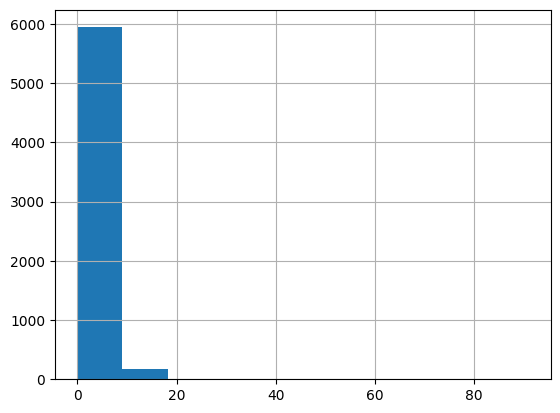

In [26]:
zinc_data['value'].hist()

In [27]:
zinc_data['value'].describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

## c.3) Finden Sie in Ihrer Tabelle Edamer (Cheese, edam). Hat Edamer einen überdurchschnittlichen Zinkgehalt? Haben mehr als 75% aller Nahrungsmittel einen kleineren Zinkgehalt?

In [28]:
edam = zinc_data[zinc_data['description'] == 'Cheese, edam']
edam

,value,units,nut_des,nut_grp,id,description,group,manufacturer
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,


Der Zinkgehalt von Edamer ist überdurchschnittlich. Mehr als 75% aller Nahrungsmittel haben einen kleineren Zinkgehalt.

## c.4) Welches Nahrungsmittel hat den maximalen Zinkgehalt?

In [29]:
zinc_data.loc[zinc_data['value'].idxmax()]

value                                       90.95
units                                          mg
nut_des                                  Zinc, Zn
nut_grp                                  Elements
id                                          15170
description     Mollusks, oyster, eastern, canned
group              Finfish and Shellfish Products
manufacturer                                     
Name: 333726, dtype: object

In [30]:
%version_information

Software versions
Python 3.10.11 64bit [MSC v.1929 64 bit (AMD64)]
IPython 8.17.1
OS Windows 10 10.0.19045 SP0
Mon Oct 30 22:51:31 2023 Mitteleuropäische Zeit